Assignment
Apply feature selection to the Olivetti faces dataset, identifying the most important 25% of features based on the chi2 criteria. This dataset consists of 10 pictures each of 40 individuals. You can visualize these top selected features on a 64x64 pixel heatmap for visual aid.

Apply tSNE to the digits dataset (transform to 2D) and perform K-means clustering into 10 clusters in 2D space. calculate sklearn.metrics.adjusted_rand_score between the labels obtained in clustering and the original labels. http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection

/Users/syedather/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/syedather/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/syedather/scikit_learn_data
(400, 4096) (400,)


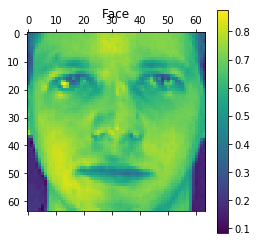

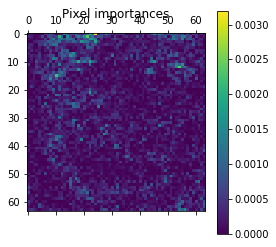

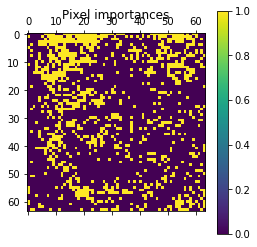

In [4]:
from sklearn.datasets import fetch_olivetti_faces

faces = sklearn.datasets.fetch_olivetti_faces()

X = faces.data
y = faces.target
print(X.shape, y.shape)

plt.matshow(X[0].reshape((64,64)))
plt.colorbar()
plt.title("Face")
plt.show()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X, y)

rankings = clf.feature_importances_


plt.matshow(rankings.reshape((64,64)))
plt.colorbar()
plt.title("Pixel importances")
plt.show()

p75 = np.percentile(rankings, 75)

mask = rankings > p75

plt.matshow(mask.reshape((64,64)))
plt.colorbar()
plt.title("Pixel importances")
plt.show()

/Users/syedather/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


explained variance ratio (first two components): [ 0.14890594  0.13618771]


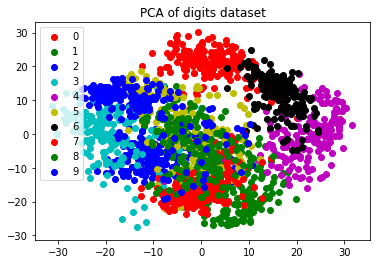

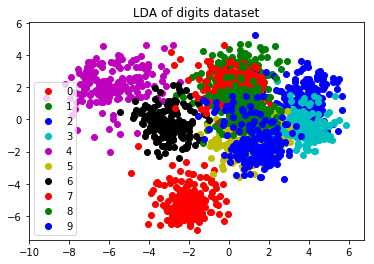

In [5]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

digits = datasets.load_digits()

X = digits.data
y = digits.target
target_names = digits.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip("rgbcmykrgbcmyk", range(10), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend(scatterpoints=1)
plt.title('PCA of digits dataset')

plt.figure()
for c, i, target_name in zip("rgbcmykrgbcmyk", range(10), target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend(scatterpoints=1)
plt.title('LDA of digits dataset')

plt.show()

In [ ]:
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

In [6]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(X)
scatterplot_2D(R_NMF, 'Kmeans in 7D, 4 clusters', kmeans.labels_)
print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

NameError: name 'scatterplot_2D' is not defined